<a href="https://colab.research.google.com/github/hiydavid/tfdev_learning/blob/main/DeepLearningWithPython/notebooks/ch3_intro_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Keras & TensorFlow

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


# Constant Tensors & Variables

In [2]:
# a 2x1 tensor of 1s
x = tf.ones(shape=(2, 1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [3]:
# a 2x1 tensor of 0s
x = tf.zeros(shape=(2, 1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

In [4]:
# a random tensors of normal distribution
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[-0.30624413],
       [-0.8708845 ],
       [ 0.95139444]], dtype=float32)>

In [5]:
# a random tensor of uniform distribution
x = tf.random.uniform(shape=(3, 1), minval=0, maxval=1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.0072242],
       [0.7320603],
       [0.8918452]], dtype=float32)>

In [17]:
# tf.Variables are assignable
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.695875  ],
       [0.16028677],
       [1.0769422 ]], dtype=float32)>

In [18]:
# try assigning value to the above tensor variable
v.assign(tf.ones(shape=(3, 1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [19]:
# try assigning a value to a subset of a tensor variable
v[0, 0].assign(3.)
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [20]:
# assign_add and assign_sub are += and -= respectively
v.assign_add(tf.ones(shape=(3, 1)))
v.assign_sub(tf.ones(shape=(3, 1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [25]:
# basic tensorflow math
a = tf.ones(shape=(2, 2))
b = tf.square(a)
print(b)
c = tf.sqrt(a)
print(c)
d = b + c
print(d)
e = tf.matmul(a, b)
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [26]:
# element-wise multiplication
e *= d
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

# Gradient Basics

In [11]:
# create a tensor of 1 value
input_var = tf.Variable(initial_value=3.)
input_var.numpy()

3.0

In [12]:
# use gradienttape on tf.Variables
"""
gradients = tape.gradient(loss, weights)
"""

with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [13]:
# use gradienttape on tf.constant
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [14]:
# use nested gradient tapes
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

speed, acceleration

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.8>)

# Create a Linear Classifier from Pure TensorFlow

`prediction = W * input + b`

In [27]:
# generate two classes of random points
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

In [29]:
# stacking both classes into an array with shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs

array([[ 2.740948  ,  3.9296231 ],
       [-0.8488008 ,  1.8400717 ],
       [ 0.6159153 ,  2.320971  ],
       ...,
       [ 3.47979   , -0.59327286],
       [ 2.6544495 , -0.5307981 ],
       [ 3.5810084 , -0.8155153 ]], dtype=float32)

In [30]:
# generate correspondent labels
targets = np.vstack((
    np.zeros((num_samples_per_class, 1), dtype="float32"),
    np.ones((num_samples_per_class, 1), dtype="float32")))
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

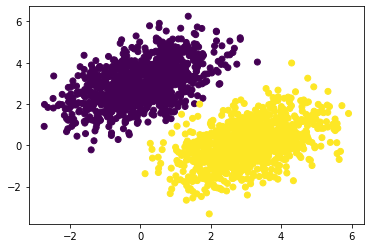

In [37]:
# plot data
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [39]:
# classifier variables initialized randomly
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim)))

W, b

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.33228266],
        [0.8039528 ]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>)

In [40]:
# create a forward pass function
def model(inputs):
    return tf.matmul(inputs, W) + b

In [41]:
# mse as loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [44]:
# training step function
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [45]:
# batch training loop
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.9129
Loss at step 1: 0.4459
Loss at step 2: 0.1720
Loss at step 3: 0.1247
Loss at step 4: 0.1112
Loss at step 5: 0.1033
Loss at step 6: 0.0966
Loss at step 7: 0.0906
Loss at step 8: 0.0851
Loss at step 9: 0.0801
Loss at step 10: 0.0755
Loss at step 11: 0.0713
Loss at step 12: 0.0674
Loss at step 13: 0.0639
Loss at step 14: 0.0607
Loss at step 15: 0.0577
Loss at step 16: 0.0550
Loss at step 17: 0.0526
Loss at step 18: 0.0503
Loss at step 19: 0.0482
Loss at step 20: 0.0464
Loss at step 21: 0.0446
Loss at step 22: 0.0430
Loss at step 23: 0.0416
Loss at step 24: 0.0403
Loss at step 25: 0.0390
Loss at step 26: 0.0379
Loss at step 27: 0.0369
Loss at step 28: 0.0360
Loss at step 29: 0.0351
Loss at step 30: 0.0344
Loss at step 31: 0.0336
Loss at step 32: 0.0330
Loss at step 33: 0.0324
Loss at step 34: 0.0318
Loss at step 35: 0.0313
Loss at step 36: 0.0309
Loss at step 37: 0.0305
Loss at step 38: 0.0301
Loss at step 39: 0.0297


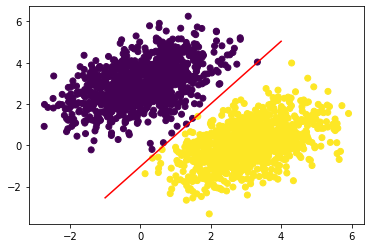

In [49]:
# plot classifier
predictions = model(inputs)
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

# The Keras API

In [63]:
# A Dense layer implemented as a Layer subclass
class SimpleDense(tf.keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
    
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(
            shape=(input_dim, self.units),
            initializer="random_normal")
        self.b = self.add_weight(
            shape=(self.units,),
            initializer="zeros")
    
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [64]:
# initiate SimpleDense
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)
